In [1]:
#Info

#This script can be used to elaborate the data from MS. It will plot based on strain name and metabolite selected.
# In this example peak / caffeine is plotted but Amt can be also selected
#Requires: 1 Excel file with at least 2 sheets: data and layout 

#Sheet 1 called "data" contains 4 columns : Peak.Name, 	Area, 	Amt, 	Sample.Notes. Numbers in cells should not have commas or dots.
#Sheet 2 called "layout" contains at least 2 columns: Well, name. Other columns containing other info on the strain are optional. 
#Additional sheets can contain additional info regarding the strain. In this example, sheet "Gene" contains info on the used genes
#
#



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('./GS_testing/Example.xlsx', sheet_name='data') 
names = [ 'Peak_Name', 'Area', 'Amt', 'Sample_Notes']
df.columns = names
df.head()

mask = df['Sample_Notes'].str.contains('96WP1172_') #change to your plate number
df = df[mask]
df.Sample_Notes.replace('96WP1172_', '', regex=True, inplace = True)
df.head()

df['Well'] = df['Sample_Notes']
df['Strain'] = df['Sample_Notes']


layout = pd.read_excel('./GS_testing/Example.xlsx', sheet_name='layout')
gene = pd.read_excel('./GS_testing/Example.xlsx', sheet_name='Gene')

layout_dict = dict(zip(layout.Well, layout.name))
gene_dict = dict(zip(gene.name, gene.Gene))


df['Strain'].replace(layout_dict, inplace=True)
df['Sample_Notes'].replace(layout_dict, inplace = True)
df['Sample_Notes'].replace(gene_dict, inplace = True)
df

###
#This part removes samples that had caffeine 50x lower than median, can be changed to any value
control = df.loc[df['Peak_Name'] == 'Caffeine'] 
Caff_median = control['Area'].median() /50 
to_be_removed = control.loc[control['Area']< Caff_median]
to_drop = to_be_removed.Well.unique().tolist()
to_drop
#Remove Wells with low caffeine
df.drop(index=df[df['Well'].isin(to_drop)].index, inplace=True)
###

len(df)

# Normalize peak area by caffeine peak
df_normalized = df.copy()
divider = list(df.loc[df['Peak_Name']== 'Caffeine', 'Area'])
divider = divider * len(df.Peak_Name.unique())
df_normalized['Norm_area'] = df_normalized['Area'] / divider 

df_normalized["Amt"] = pd.to_numeric(df_normalized["Amt"], errors= 'coerce')

df_normalized.info()





<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 22 to 717
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Peak_Name     462 non-null    object 
 1   Area          462 non-null    int64  
 2   Amt           319 non-null    float64
 3   Sample_Notes  462 non-null    object 
 4   Well          462 non-null    object 
 5   Strain        462 non-null    object 
 6   Norm_area     462 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ KB


/Users/vasdam/ml/my_env/lib/python3.8/site-packages/seaborn/categorical.py:3803: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


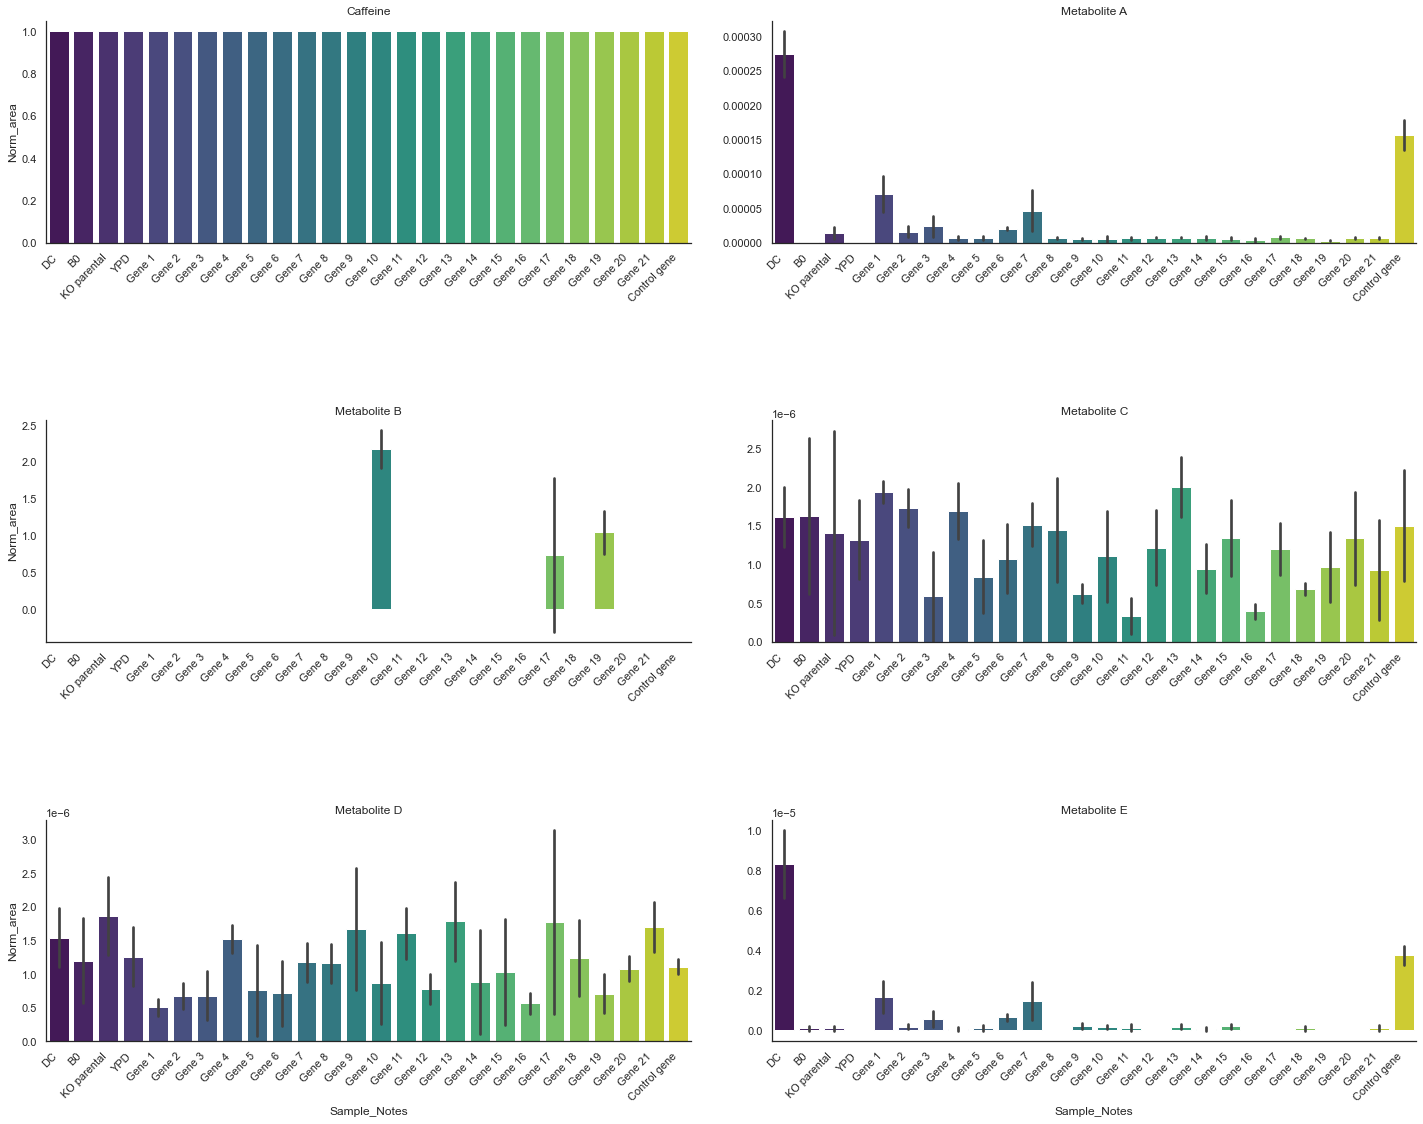

In [8]:
sns.set(style = 'white', font_scale = 1)
g= sns.catplot(data= df_normalized, x='Sample_Notes', y ='Norm_area', col='Peak_Name', col_wrap= 2,
               kind='bar', sharey = False,sharex = False ,ci = 'sd', palette = 'viridis', dodge = False, aspect=2)
g.set_titles(template='{col_name}')

for i in g.axes.flat:
    i.tick_params(labelbottom=True)
    plt.setp(i.get_xticklabels(), rotation=45, ha = 'right')
plt.subplots_adjust(hspace=0.8)






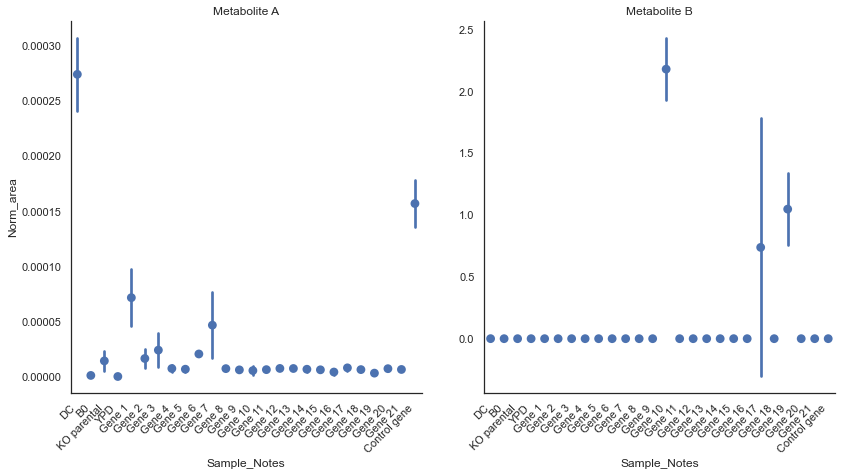

In [3]:
sns.set(style = 'white', font_scale = 1)
g= sns.catplot(data= df_normalized.loc[df_normalized['Peak_Name'].isin(['Metabolite A', 'Metabolite B'])],  # can choose more metabolites
            x= 'Sample_Notes', y ='Norm_area', col='Peak_Name', col_wrap= 2,
               kind='point', sharey = False  , join = False, ci = 'sd', height= 6)

g.set_titles(template='{col_name}')

for i in g.axes.flat:
    i.tick_params(labelbottom=True)
    plt.setp(i.get_xticklabels(), rotation=45, ha = 'right')
     
plt.subplots_adjust(hspace=0.8)






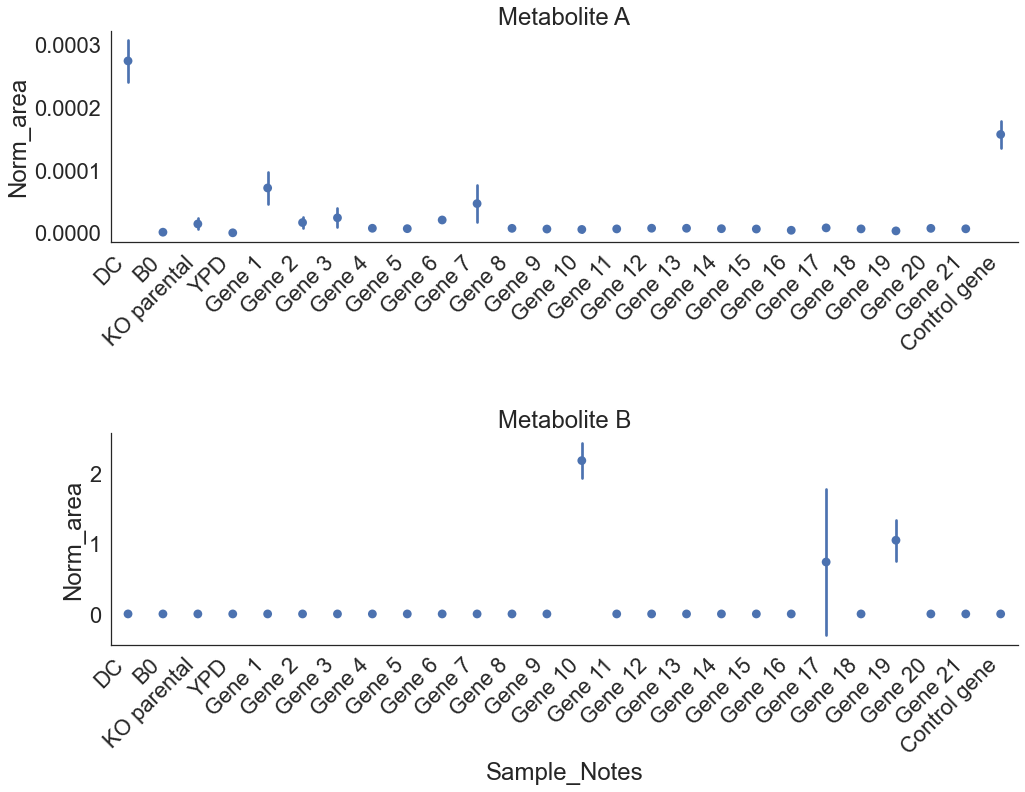

In [4]:
sns.set(style = 'white', font_scale = 2)
g= sns.catplot(data= df_normalized.loc[df_normalized['Peak_Name'].isin(['Metabolite A', 'Metabolite B'])],
            x= 'Sample_Notes', y ='Norm_area', col='Peak_Name', col_wrap= 1,
               kind='point', sharey = False  , join = False, ci = 'sd', height= 5, aspect = 3)

g.set_titles(template='{col_name}')

for i in g.axes.flat:
    i.tick_params(labelbottom=True)
    plt.setp(i.get_xticklabels(), rotation=45, ha = 'right')
   

    
plt.subplots_adjust(hspace=0.9)



<ipython-input-5-0faea23c00c5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected['scaled_val'] = selected['Norm_area']
/Users/vasdam/ml/my_env/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


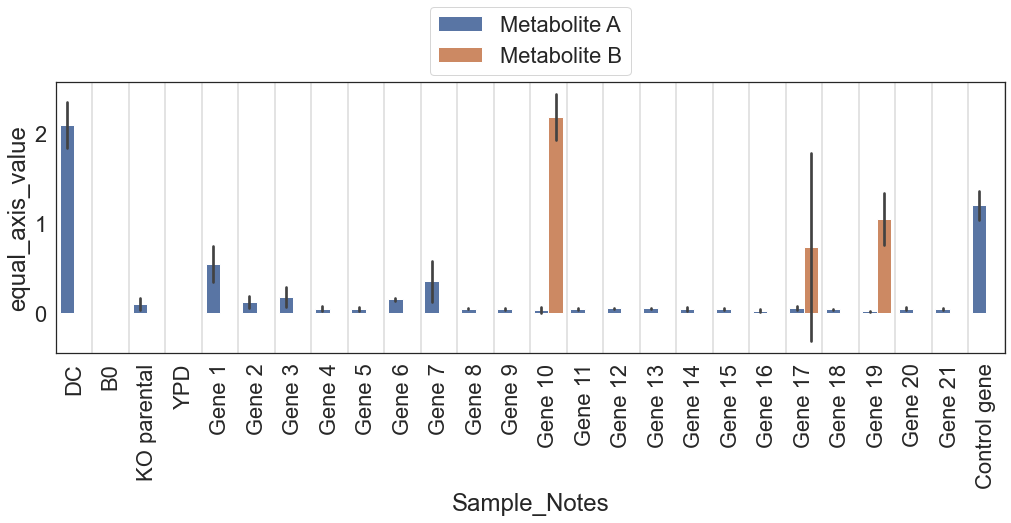

In [5]:
#Here you select 2 metabolites that are at different scales (ie one has value between 0 and 10, tyyhe other between 1000 and 10000) that you want to plot together
selected = df_normalized.loc[df_normalized['Peak_Name'].isin(['Metabolite A', 'Metabolite B'])]
selected.head()

norm = selected.loc[selected['Peak_Name'] == 'Metabolite B', 'Norm_area'].max()/ selected.loc[selected['Peak_Name'] == 'Metabolite A', 'Norm_area'].max()
norm # This is the normaliser. You have to:
#A: Divide the sample with bigger values or
#B: multiply the sample with lower values

selected['scaled_val'] = selected['Norm_area']
selected.loc[selected['Peak_Name']== 'Metabolite A', 'scaled_val'] = selected.loc[selected['Peak_Name']== 'Metabolite A', 'scaled_val'] * norm

selected.head(45)

from matplotlib.ticker import MultipleLocator
plt.figure(figsize=(17, 5))
g =sns.barplot(data = selected, x = 'Sample_Notes', y = 'scaled_val', ci = 'sd', hue = 'Peak_Name')
g.xaxis.set_minor_locator(MultipleLocator(0.5))
g.xaxis.grid(True, which='minor', color='black', lw=0.22)
plt.legend(loc = 'center', bbox_to_anchor=(0.25, 1, 0.5, 0.3))
plt.ylabel('equal_axis_value')
plt.setp(g.get_xticklabels(), rotation=90)

plt.show()



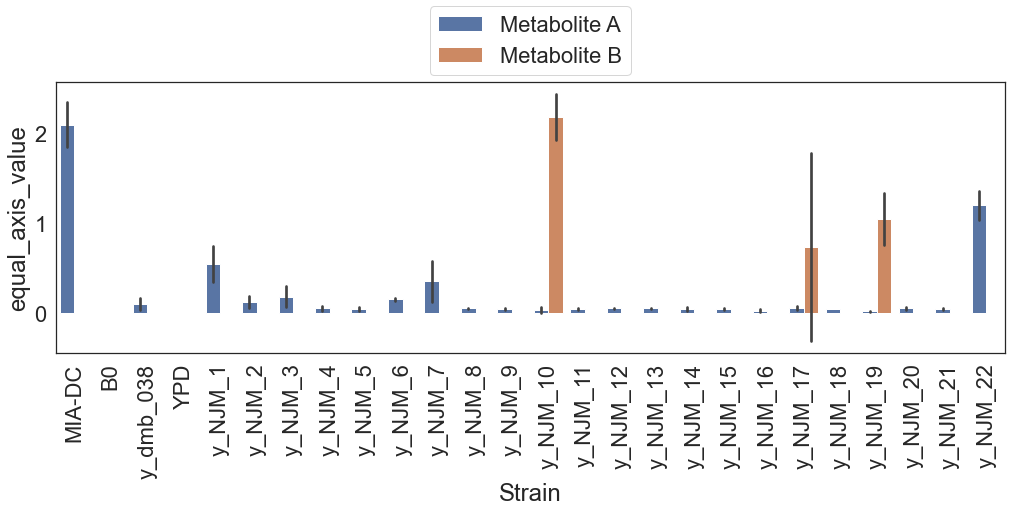

In [6]:
plt.figure(figsize=(17, 5))
g =sns.barplot(data = selected, x = 'Strain', y = 'scaled_val', ci = 'sd', hue = 'Peak_Name')

plt.legend(loc = 'center', bbox_to_anchor=(0.25, 1, 0.5, 0.3))
plt.ylabel('equal_axis_value')
plt.setp(g.get_xticklabels(), rotation=90)

plt.show()